#**Tarea 3 Módulo: Ajuste de Modelos**

**Nombre:** Mariana Stone

**Curso:** Módulo Interdisciplinario: Ciencia de Datos en Astronomía

In [16]:
#Importamos las librerías a utilizar
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

# **Primera Parte) ¿Materia oscura o solo materia luminosa?**

La curva de rotación de una galaxia es la velocidad a la cual sus estrellas o gas rota en torno a su centro como función de la distancia. Asumiendo movimiento circular y la ley de Gravitación de Newton, se puede obtener la siguiente fórmula para la curva de rotación (o ecuación de movimiento):

(1)   $v(R)=\sqrt{\frac{GM(R)}{R}}$

(2) $M_{star}(R,M_{1},R_{1})=M_{1}\times[1-\frac{exp(-R/R)(R+R_{1})
}{R_{1}}]$









# **P1)**

Para esta parte de la tarea será necesario trabajar con unidades, en particular, para distancias galácticas la unidad más típica es el kilo-parsec. Defina que es un kilo-parsec (kpc) y muestre su equivalencia en metros.

In [17]:
kpc=1*u.kiloparsec #calculamos 1 kpc
kpc_to_m=kpc.to(u.meter)#transformación 1kpc a metros
diametro_Tierra=12743018*u.meter # diámetro de la Tierra en metros
numero_Tierras=kpc_to_m/diametro_Tierra #Calculamos el número de tierras que se pueden colocar en un kpc
kpc_to_m

<Quantity 3.08567758e+19 m>

**¿Cuántos planetas Tierra puede colocar uno al lado del otro dentro de 1 kpc de distancia?**

Teniendo en cuenta que el diámetro de la tierra es de aproximadamente $12.743.018 [m]$ y que un kpc equivale a $3.0856776*10^{19}[m]$, haciendo la siguiente ecuación podemos encontrar el número de Tierras que podemos colocar:

$x*12.743.018 [m]=3.0856776x10^{19}[m]$

=> $x=\frac{3.0856776x10^{19}[m]}{12.743.018 [m]} =2.4214653*10^{12}
Tierras$

Este número es una aproximación :)

# **P2)**

Grafique la curva de velocidad $v(R)$
 para la distribución de masa dada en la ecuación (2). Para ello considere $M_1=10^{10}M_{solar}$
 y $R_1=5 kpc$, donde $M_{solar} ≈ 1.98*10^{30}$ kg.

In [18]:
#Constantes a utilizar para las funciones
m_=1*u.meter
km=m_.to(u.kilometer)
G=6.67e-11 *(km**3)*(u.kilogram**(-1))*(u.second**(-2))
solar_masses_to_kg=1.989e30*u.kilogram
kpc_to_km=kpc.to(u.kilometer)
M1=1e10
R1=5

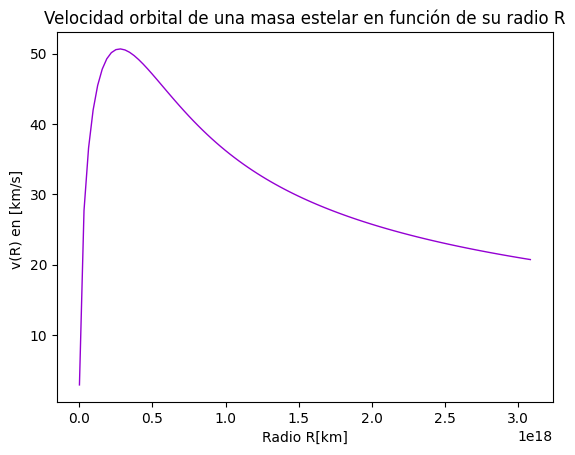

In [19]:
#Creamos la funcion M_star(R,M_1,R_1)
def M_star(R,M_1,R_1):
  return M_1*(1-((np.exp((-R)/R_1)*(R_1+R))/(R_1)))

#Creamos la funcion v_R_stars(R,M_1,R_1)
def v_R_stars(R,M_1,R_1):
  return np.sqrt((G*M_star(R,M_1,R_1))/R)


#Arreglo R con distancias desde 0.01 kpc a 100 kpc con 100 elementos
R=np.linspace(0.01, 100, 100)
#Cálculo v(R) con R1, M1 y R
v_r_stars=v_R_stars(R*kpc_to_km, M1*solar_masses_to_kg, R1*kpc_to_km)

#Gráfico R, en función de v(R)
plt.plot(R*kpc_to_km,v_r_stars, color='#9400D3', linewidth=1)
plt.xlabel("Radio R[km]")
plt.ylabel("v(R) en [km/s] ")
plt.title("Velocidad orbital de una masa estelar en función de su radio R")
plt.show()

# **P3)**

Qué puede decir del comportamiento de $v(R)$ para $R>>R1$? Aproxime
 en dicho caso e indique la forma que tendrá.

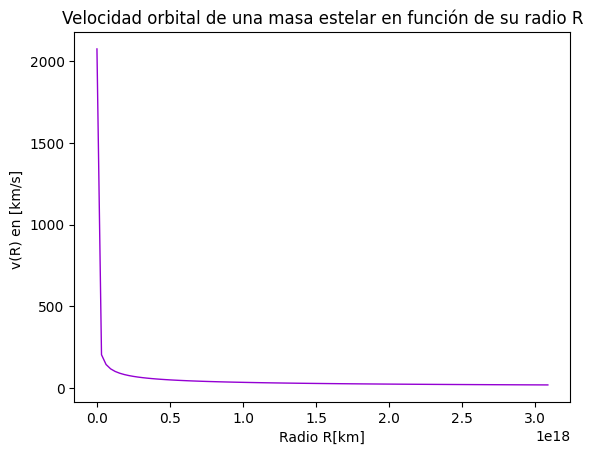

In [20]:
#Si graficamos v(R) con R>>R1=R2, con R2=0.00000000001, nos queda la siguiente curva
R2=0.00000000001
v_r2_stars=v_R_stars(R*kpc_to_km, M1*solar_masses_to_kg, R2*kpc_to_km)
plt.plot(R*kpc_to_km,v_r2_stars, color='#9400D3', linewidth=1)
plt.xlabel("Radio R[km]")
plt.ylabel("v(R) en [km/s] ")
plt.title("Velocidad orbital de una masa estelar en función de su radio R")
plt.show()

Ahora agregamos la componente de materia oscura dada por la siguiente ecuación:

(3). $M_{dm}=𝑀_{0}×[\log(\frac{R_{0}+R}{R_{0}})+\frac{R_{0}}{R_{0}+R}-1]$

# **P4)**
Añada al gráfico anterior la curva de rotación dada por perfil de la ecuación (3) considerando $M_0=5\times10^{10} M_{solar}$, y $R_0=20kpc$


In [21]:
#Definimos las constantes a utilizar
M0=5*1e10*solar_masses_to_kg
R0=20*kpc_to_km
R=np.linspace(0.01, 100, 100)*kpc_to_km

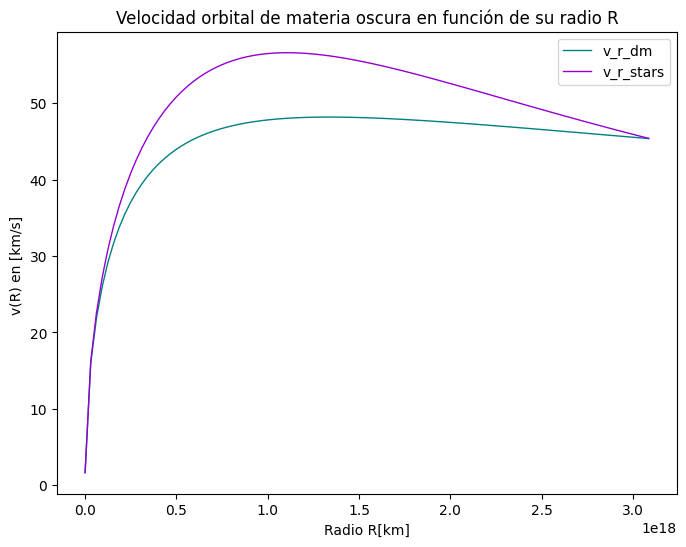

In [22]:
#Creamos la funcion M_dm(R,M0,R0)
def M_dm(R_, M_0, R_0):
    return M_0*((np.log((R_0+R_)/R_0)+(R_0/(R_0+R_)))-1)

#Creamos la funcion v_R_dm(R,M0,R0)
def v_R_dm(R_,M_0,R_0):
  return np.sqrt((G * M_dm(R_,M_0,R_0)) /(R_))


v_r_dm=v_R_dm(R, M0, R0)
v_r_stars=v_R_stars(R,M0,R0)
plt.figure(figsize=(8,6))
plt.plot(R, v_r_dm, color='#008080', label='v_r_dm', linewidth=1)
plt.plot(R,v_r_stars, color='#9400D3', linewidth=1, label='v_r_stars')
plt.xlabel("Radio R[km]")
plt.ylabel("v(R) en [km/s] ")
plt.title("Velocidad orbital de materia oscura en función de su radio R")
plt.legend()
plt.show()

**P5)**

**¿Qué componente parece dominar a distancias cortas?**
**¿Cuál a distancias largas?**

Según el gráfico anterior, podemos ver que la componente de materia luminosa o estelar parece dominar en la velocidad orbital con radios más pequeños (distancias más cortas) y la componente de materia oscura parece dominar en la velocidad orbital con radios más grandes (distancias más largas).

# **Parte 2) Análisis de la curva de rotación de la galaxia NGC 6503**

Es razonable pensar que uno necesita tanto el componente deducido por la masa estelar (o luminosa) como aquella que no interactúa con la luz (materia oscura), por lo que un perfil de masa más completo involucra una suma de cada componente tal como se describe en la siguiente ecuación:

(4) $M_{tot}(R, M_{0},R_{0},M_{1},R_{1})= M_{dm}(R,M_{0},R_{0})+M_{star}(R, M_{1},R_{1})$


Ahora analizaremos la curva de rotación de la galaxía NGC 6503, con el archivo velocity_curve_NGC6503.txt, donse sus columnas contienen distancia del centro (en kpc), velocidad medida (en km/s) y el error estándar en la medición (en km/s).



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(0.5, 1.0, 'Velocidad orbital de masas de la galaxia NGC 6503 en función de su radio R')

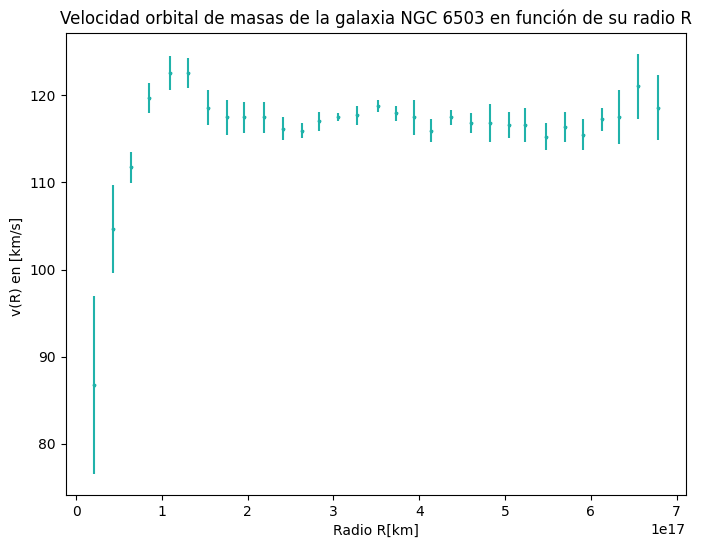

In [23]:
#Para importar el archivo:
#En primer lugar, accedemos a google drive
from google.colab import drive
drive.mount('/content/drive')
#Ahora copiamos la ruta al archivo a utilizar (en este caso es curva_de_velocidad_NGC6503)y la guardamos como 'path_archivo'
path_archivo='/content/drive/MyDrive/velocity_curve_NGC6503.txt'
#Por último, leemos el archivo a través de np.loadtxt y lo guardamos como 'datos'
datos=np.loadtxt(path_archivo)
ejex=datos[:,0]*kpc_to_km
ejey=datos[:,1]
error=datos[:,2]

#Graficamos los datos del archivo
plt.figure(figsize=(8,6))
plt.errorbar(ejex,ejey, yerr=error, linestyle='', marker='*', markersize=2.5, color='#20B2AA')
plt.xlabel("Radio R[km]")
plt.ylabel("v(R) en [km/s] ")
plt.title("Velocidad orbital de masas de la galaxia NGC 6503 en función de su radio R")

**En esta parte ajustaremos 3 modelos de curva de rotación para esta galaxia:**

1.Solo componente estelar.

2.Solo materia oscura.

3.Componente estelar y materia oscura.

**¿Es este un problema de ajuste de modelos lineal o no-lineal?**

En este caso el ajuste de modelo es no lineal

In [24]:
#Importamos la librería curve_fit que nos ayudará a hacer el ajuste de modelos
from scipy.optimize import curve_fit

In [25]:
#Dado que curve_fit no toma cantidades, debemos convertir nuestras dimensiones a cantidades adimensionales
#Valores de unidades adimensionales
kpc=u.kiloparsec
m_1=u.meter
km1=m_1.to(u.kilometer)
G=6.67e-11 *(km1**3)
solar_masses_to_kg=1.989e30
kpc_to_km=kpc.to(u.kilometer)

In [39]:
#Definimos las constantes a utilizar
M0=5*1e10*solar_masses_to_kg
R0=20*kpc_to_km
M1=1e10*solar_masses_to_kg
R1=5*kpc_to_km

#Definimos las condiciones iniciales
m0=8e10*solar_masses_to_kg
r0=3*kpc_to_km
m1=1e11*solar_masses_to_kg
r1=19*kpc_to_km

#Definimos nuestros datos
R=datos[:,0]*kpc_to_km
error=datos[:,2]
v_r_stars=v_R_stars(R,M1,R1)
v_r_dm=v_R_dm(R,M0,R0)

<ipython-input-19-8d7496f382fa>:7: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((G*M_star(R,M_1,R_1))/R)


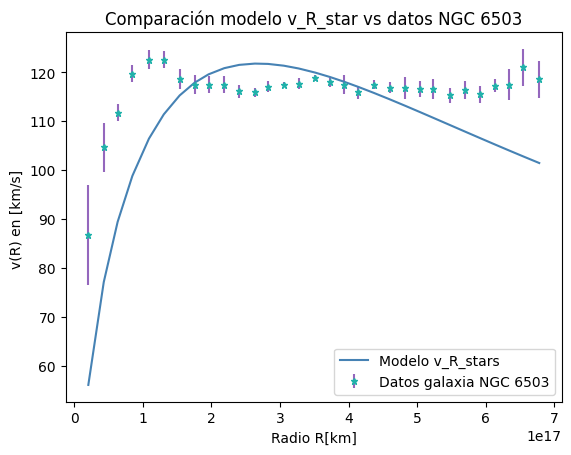

In [40]:
#Generamos la función v_R_tot(R, M0, R0, M1, R1)
def v_R_tot(R_,M_0,R_0,M_1,R_1):
  return v_R_stars(R_,M_1,R_1)+v_R_dm(R_,M_0,R_0)

v_r_tot=v_R_tot(R,M0,R0,M1,R1)

#Generamos los modelos correspondientes
#Solo componente estelar
popt_stars, pcov_stars=curve_fit(v_R_stars,R, ejey,sigma=error, p0=[m1,r1])
plt.errorbar(R,ejey, yerr=error, linestyle='', marker='*', markersize=5, color='#20B2AA',ecolor='#9467bd', label='Datos galaxia NGC 6503')
plt.plot(R, v_R_stars(R, *popt_stars), color='#4682B4',label='Modelo v_R_stars')
plt.xlabel("Radio R[km]")
plt.ylabel("v(R) en [km/s] ")
plt.title("Comparación modelo v_R_star vs datos NGC 6503")
plt.legend()

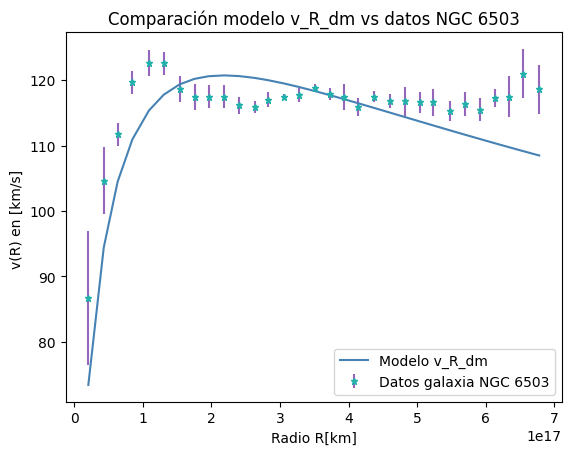

In [41]:
#Componente materia oscura
popt_dm, pcov_dm=curve_fit(v_R_dm,R, ejey,sigma=error, p0=[m0,r0])
plt.errorbar(ejex,ejey, yerr=error, linestyle='', marker='*', markersize=5, color='#20B2AA',ecolor='#9467bd', label='Datos galaxia NGC 6503')
plt.plot(R, v_R_dm(R, *popt_dm), color='#4682B4', label='Modelo v_R_dm')
plt.xlabel("Radio R[km]")
plt.ylabel("v(R) en [km/s] ")
plt.title("Comparación modelo v_R_dm vs datos NGC 6503")
plt.legend()

<ipython-input-22-48330dcf0b18>:7: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((G * M_dm(R_,M_0,R_0)) /(R_))


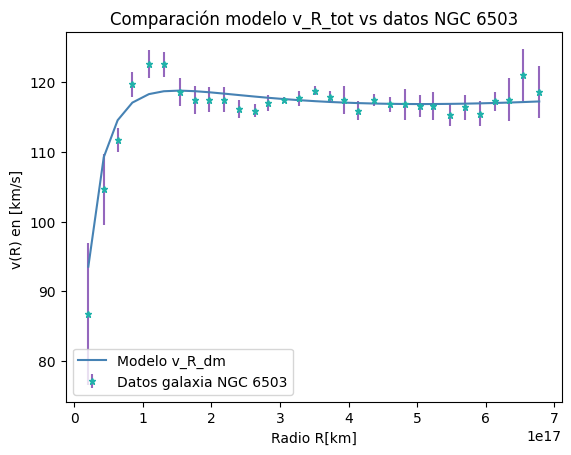

In [42]:
#Ambas
popt_tot, pcov_dm=curve_fit(v_R_tot,R, ejey,sigma=error, p0=[m0,r0,m1,r1])
plt.errorbar(ejex,ejey, yerr=error, linestyle='', marker='*', markersize=5, color='#20B2AA', ecolor='#9467bd', label='Datos galaxia NGC 6503')
plt.plot(R,v_R_tot(R, *popt_tot), color='#4682B4',label='Modelo v_R_dm')
plt.xlabel("Radio R[km]")
plt.ylabel("v(R) en [km/s] ")
plt.title("Comparación modelo v_R_tot vs datos NGC 6503")
plt.legend()

**Ahora evaluaremos los modelos con la métrica 'chi cuadrado $χ^2$ ':**

$χ^2=\sum_{i=1}^{N}\frac{(y_{i}-v_{R}(x_{i}))}{σ_{i}^2}$

In [43]:
#Evaluamos cada uno de los datos x_i en nuestros modelos
x_i=np.linspace(0.01, 100, 100)*kpc_to_km #Generamos 100 datos x_i con un valor mínimo de 0.01kpc a un valor máx 100kpc
pred_stars=v_R_stars(x_i, M1,R1)#con los datos generados, sacamos la predicción del modelos v_R_star
pred_dm=v_R_dm(x_i, M0, R0)#sacamos la predicción del modelos v_R_dm
pred_tot=v_R_tot(x_i, M0,R0,M1,R1)# sacamos la predicción del modelos v_R_tot
#Creamos variables y_i y sigma
y_i=np.linspace(7e1, 12e2, 100)#Generamos 100 datos y_i con un valor mín de 7e1 km/s y un valor máx de 12e2 km/s
sigma=np.linspace(1e1,5e0,100)#Generamos los errores de medición con un largo de 100 datos, con valor mín de 1e1 km/s y un valor máx de 5e0 km/s
#Creamos la función chi cuadrado
def chi_cuadrado(datos,sigmas,pred):
  dentro_sum=(datos-pred)/(sigmas**2)
  return np.sum(dentro_sum)

#Mostramos los resultados de chi cuadrado para cada modelo, con los arreglos creados anteriormente (y_i, sigma, pred_modelo)
print('Chi-cuadrado (stars-only): ', chi_cuadrado(y_i,sigma, pred_stars))
print('Chi-cuadrado (dm-only): ', chi_cuadrado(y_i,sigma,pred_dm))
print('Chi-cuadrado (dm+stars): ', chi_cuadrado(y_i,sigma,pred_tot))

Chi-cuadrado (stars-only):  1478.9608790390332
Chi-cuadrado (dm-only):  1444.5934392495901
Chi-cuadrado (dm+stars):  1387.3905703870726


In [44]:
#Ahora probamos la función con los datos del archivo velocity_curve_NGC6503
x_i=R
pred_stars=v_R_stars(R, M1,R1)
pred_dm=v_R_dm(R, M0, R0)
pred_tot=v_R_tot(R, M0,R0,M1,R1)
#Creamos variables y_i y sigma
y_i=ejey
sigma=error
def chi_cuadrado(datos,sigmas,pred):
  dentro_sum=(datos-pred)/(sigmas**2)
  return np.sum(dentro_sum)


print('Chi-cuadrado (stars-only): ', chi_cuadrado(y_i,sigma, pred_stars))
print('Chi-cuadrado (dm-only): ', chi_cuadrado(y_i,sigma,pred_dm))
print('Chi-cuadrado (dm+stars): ', chi_cuadrado(y_i,sigma,pred_tot))

Chi-cuadrado (stars-only):  1384.6801038033002
Chi-cuadrado (dm-only):  1572.6430488036162
Chi-cuadrado (dm+stars):  587.3319332905079


**¿Qué modelo ajusta mejor los datos bajo la métrica anterior? ¿El peor?**

Podemos notar que el modelo v_R_tot es el modelo con el menor valor de $χ^2=587.3319332905079$, por lo que este es el que mejor se ajusta a los datos del archivo velocity_curve_NGC6503. Por otro lado, el modelo v_R_dm tiene un valor de $χ^2=1572.6430488036162$, siendo este el mayor valor de los tres modelos, por lo que este es el que peor se ajusta a la métrica anterior.


**¿Qué puede concluír de los constituyentes de la galaxia NGC6503?**

# **Parte 3) Proposición de un modelo**

En este caso ajustaremos polinomios de distinto grado y determinaremos el grado óptimo del modelo tal que su capacidad predictiva no se vea alterada.

Considerando la siguiente función:

$f(x)=5sen(x)+5cos(x^2)+3$

In [32]:
#Creamos random.seed
np.random.seed(123)


**¿Qué hace la línea de código anterior?**

La linea anterior inicializa el generador de números pseudoaleatorios. El número que toma (también llamado semilla) es el valor inicial del conjunto de números generado pseudoaleatoriamente.


**¿Por qué es una buena práctica utilizar una "semilla" cuando se realizan experimentos aleatorios?**

Porque de esta forma obtendremos el mismo conjunto de números aleatorios, para la misma semilla, en cualquier situación.

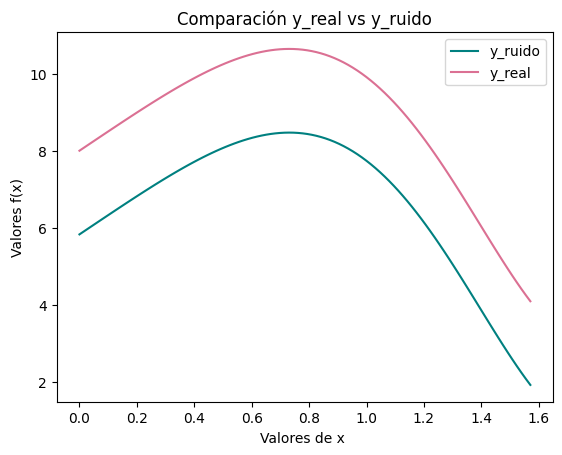

In [33]:
#Generamos los datos que utilizaremos
N_data=100
x=np.linspace(0,np.pi/2, N_data)
#Calculamos un arreglo con la función descrita anteriormente f(x)
y_real=5*np.sin(x) + 5*np.cos(x**2) + 3
#Ahora sumaremos ruido a y_ real con la función np.random.normal
ruido=np.random.normal(loc=0, scale=2)
y_ruido=y_real+ruido

plt.plot(x, y_ruido, color='#008080', label='y_ruido')
plt.plot(x,y_real, color='#DB7093', label='y_real')
plt.xlabel("Valores de x ")
plt.ylabel("Valores f(x)")
plt.title("Comparación y_real vs y_ruido")
plt.legend()

Ahora haremos un ajuste con modelos polinomiales y, utilizando cross-validation, determinaremos el grado del polinomio óptimo a modo de favorecer la capacidad predictiva del modelo.

In [34]:
#primero importamos las librerías a utilizar
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [35]:
#Creamos las variables N_iteraciones y errores_modelos para explorar polinomios de grado 1 hasta 10
N_iteraciones  = 100
errores_modelos = np.zeros((10, N_iteraciones))

for i in range(100):
  x_train,x_test,y_train, y_test=train_test_split(x,y_ruido, train_size=0.75)
  for j in range(10):
    poly=PolynomialFeatures(degree=j+1, include_bias=True)
    poly_features=poly.fit_transform(x_train.reshape(-1,1))
    poly_test=poly.fit_transform(x_test.reshape(-1,1) )
    poly_reg_model=LinearRegression()
    poly_reg_model.fit(poly_features, y_train)
    y_predicted=poly_reg_model.predict(poly_test)
    errores_modelos[j,i]=mean_squared_error(y_test,y_predicted)



[2.32065892e+00 4.39215063e-02 2.00959151e-02 3.22863349e-03
 4.15475459e-05 3.91471936e-06 9.24543932e-07 2.69519168e-08
 6.93655208e-11 8.79872478e-11]


Text(0.5, 1.0, 'Error cuadrático medio en función de los grados del polinomio')

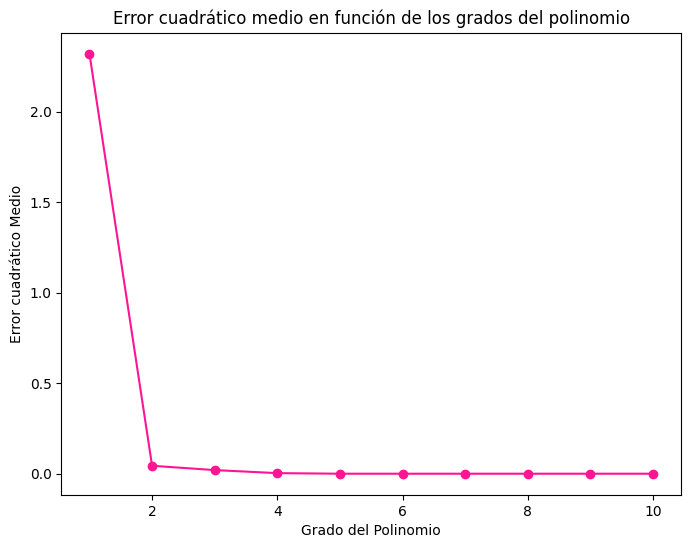

In [36]:
#Promedio modelos
promedio_modelos=np.mean(errores_modelos,axis=1)
print(promedio_modelos)
#Generamos gráfcios con los promedios de los modelos y los grados del polinomio
plt.figure(figsize=(8,6))
plt.plot(np.arange(1,11), promedio_modelos, marker='o', linestyle='-', color='#FF1493')
plt.xlabel('Grado del Polinomio')
plt.ylabel('Error cuadrático Medio')
plt.title('Error cuadrático medio en función de los grados del polinomio')


In [37]:
#Polinomo más óptimo es
print(f'El grado óptimo del polinomio es {np.argmin(promedio_modelos)+1}.')

El grado óptimo del polinomio es 9.
